In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use("ggplot") 

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Car%20Prices%20Poland/Car_Prices_Poland_Kaggle.csv")
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [3]:
df.shape

(117927, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


In [5]:
df.isna().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [6]:
df.isna().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [7]:
df.describe().round(2)

,Unnamed: 0,year,mileage,vol_engine,price
count,117927.00,117927.00,117927.00,117927.00,117927.00
mean,58963.00,2012.93,140976.79,1812.06,70299.88
std,34042.74,5.69,92369.36,643.61,84824.58
min,0.00,1945.00,0.00,0.00,500.00
25%,29481.50,2009.00,67000.00,1461.00,21000.00
50%,58963.00,2013.00,146269.00,1796.00,41900.00
75%,88444.50,2018.00,203000.00,1995.00,83600.00
max,117926.00,2022.00,2800000.00,7600.00,2399900.00


In [8]:
df["mark"].unique()

array(['opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz',
       'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo'], dtype=object)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


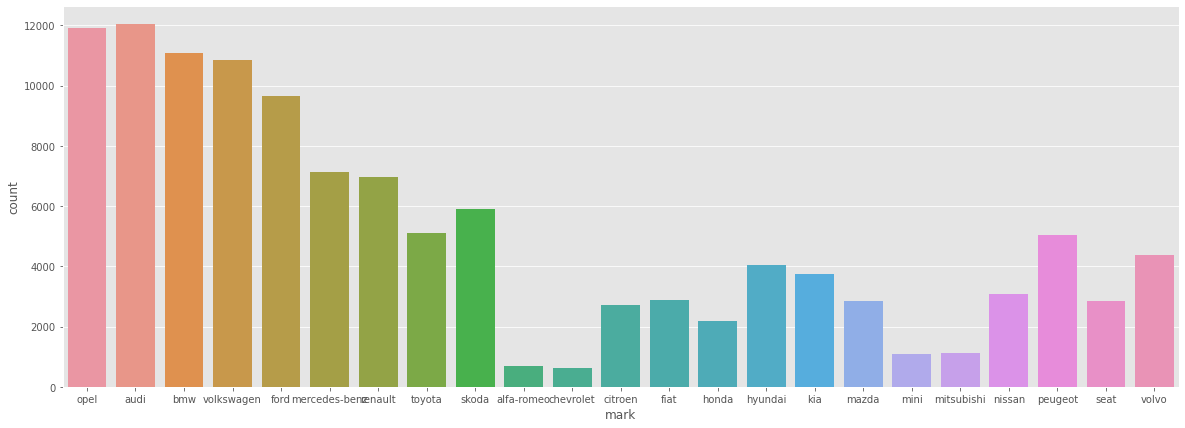

In [9]:
plt.figure(figsize=(20,7))
sns.countplot(df["mark"])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


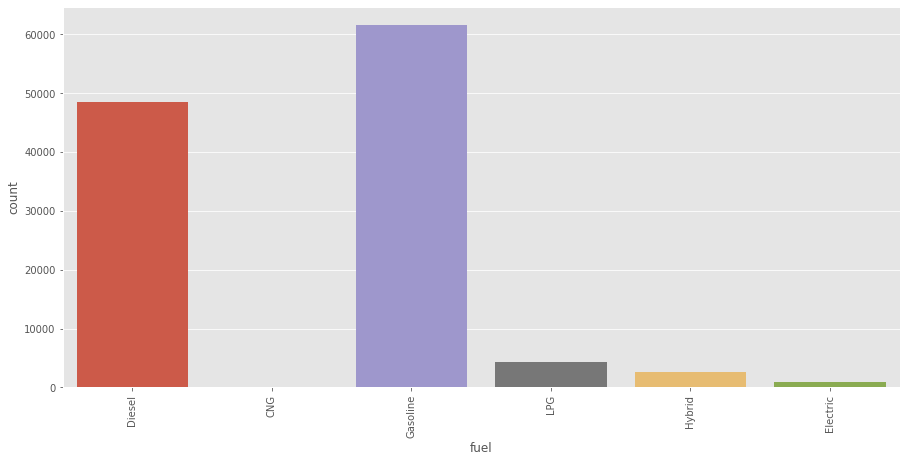

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(df["fuel"])
plt.xticks(rotation=90)
plt.show()

In [11]:
px.scatter(df,x="year",y="price",animation_frame="mark",color="fuel")

<AxesSubplot:xlabel='vol_engine', ylabel='price'>

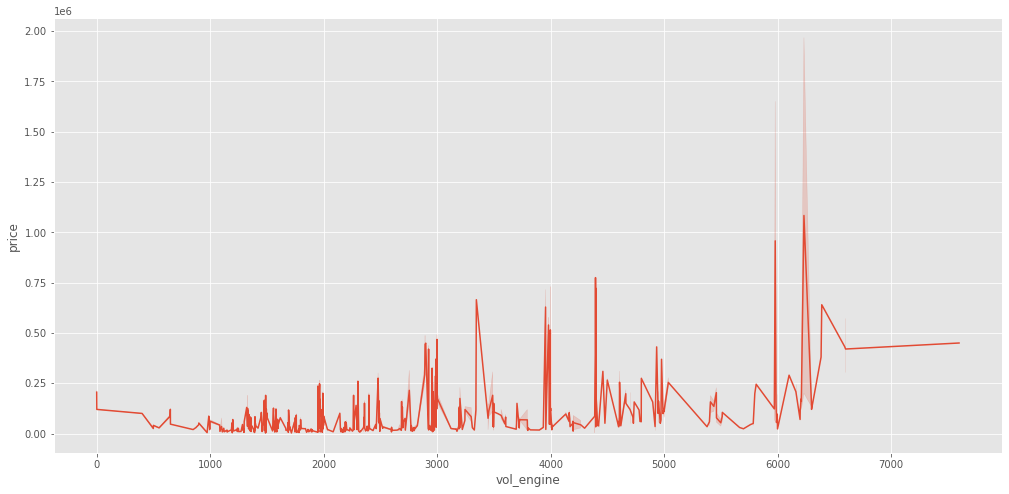

In [12]:
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="vol_engine",y="price")

In [13]:
group=df.groupby("mark")["price"].mean()
group.sort_values()

mark
citroen           34098.127206
opel              35109.647641
fiat              39326.176389
chevrolet         40287.218750
seat              40455.214185
renault           45034.324541
peugeot           47144.632714
nissan            49635.930664
mitsubishi        51085.781250
honda             51344.852941
ford              51801.098613
toyota            54567.395703
hyundai           54830.428571
mazda             57337.477528
kia               59718.260417
skoda             61684.046365
volkswagen        61800.779591
alfa-romeo        69643.068182
mini              72247.548713
audi             105034.593799
volvo            110734.153741
bmw              122836.902168
mercedes-benz    139316.949271
Name: price, dtype: float64

<AxesSubplot:xlabel='mark'>

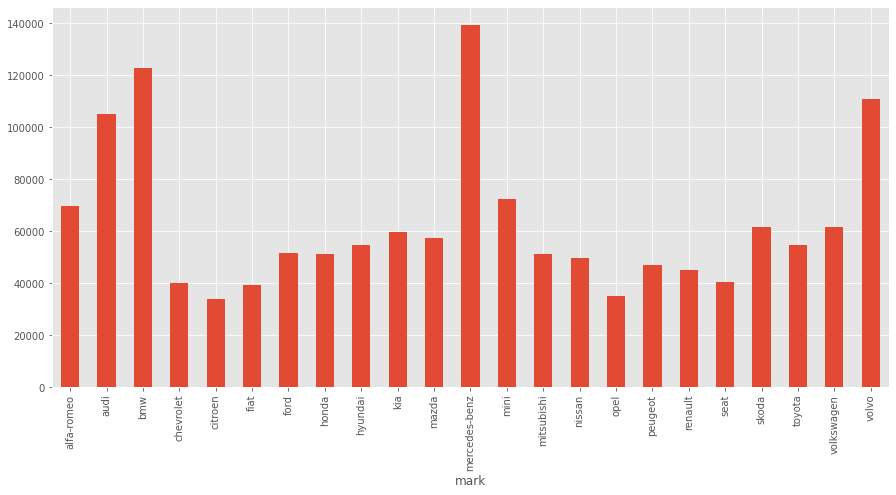

In [14]:
group.plot(kind= "bar", figsize=(15,7))

In [15]:
group2=df.groupby("fuel")["price"].mean()
group2.sort_values()

fuel
LPG          27013.299930
CNG          30979.829787
Gasoline     66054.888322
Diesel       71971.990696
Hybrid      169417.107974
Electric    193078.917514
Name: price, dtype: float64

<AxesSubplot:xlabel='fuel'>

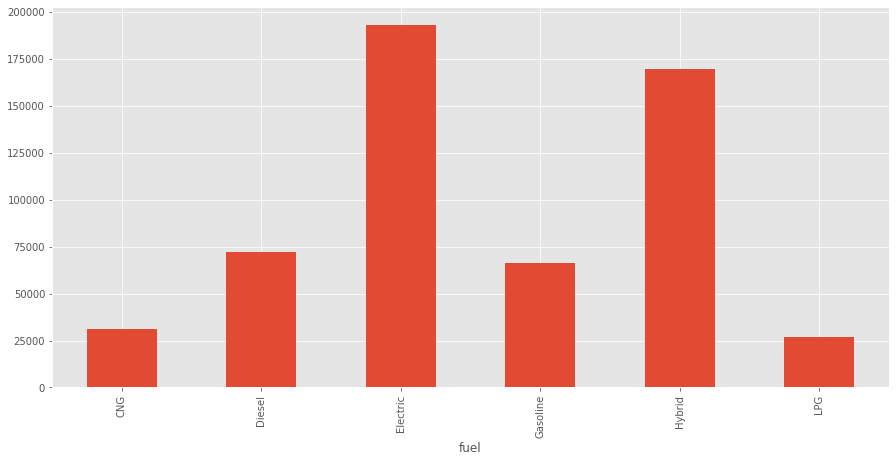

In [16]:
group2.plot(kind= "bar", figsize=(15,7))

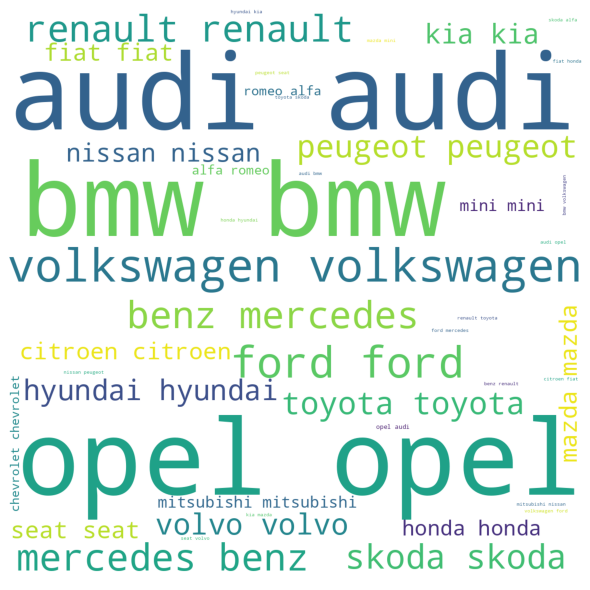

In [17]:
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df.mark:
     
    val = str(val)
 
    tokens = val.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

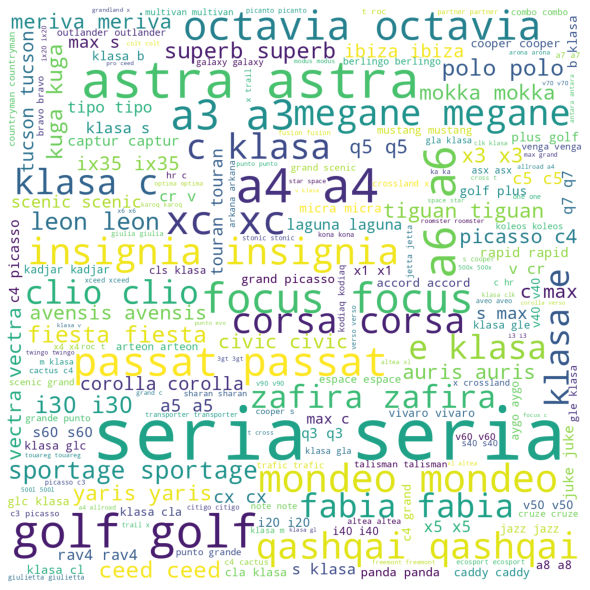

In [18]:
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df.model:
     
    val = str(val)
 

    tokens = val.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression  ,BayesianRidge,HuberRegressor,ARDRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [20]:
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [21]:
LE=LabelEncoder()
LE.fit(df["mark"])
df["Mark"]=LE.transform(df["mark"])

LE2=LabelEncoder()

LE2.fit(df["fuel"])
df["Fuel"]=LE2.transform(df["fuel"])

df.drop(columns=["mark","model","fuel","city","province"],axis=1 ,inplace=True )
df.head()

,Unnamed: 0,generation_name,year,mileage,vol_engine,price,Mark,Fuel
0,0,gen-d-2011,2015,139568,1248,35900,15,1
1,1,gen-d-2011,2018,31991,1499,78501,15,1
2,2,gen-d-2011,2015,278437,1598,27000,15,1
3,3,gen-d-2011,2016,47600,1248,30800,15,1
4,4,gen-d-2011,2014,103000,1400,35900,15,0


In [22]:
X = df.drop(columns="price")           
y = df["price"]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (88445, 7)
X Test  :  (29482, 7)
Y Train :  (88445,)
Y Test  :  (29482,)
